## **Trend Analysis**

We would use two basic packages below,

**Guidelines:**

- **yahoo finance api** : https://github.com/ranaroussi/yfinance

- **Candlestick chart** : https://github.com/matplotlib/mplfinance

In [1]:
import yfinance as yf
import mplfinance as mpf
from pandas_datareader import data as pdr
yf.pdr_override()

In [2]:
def get_data(stock_code):
    data=pdr.get_data_yahoo(tickers=stock_code,
                            interval='1d',
                            start='2015-01-01',
                            end='2020-11-13')
    return data
# An example, this api could take a little while to fetch the data
# JUST BE PATIENT
data=get_data('AAPL')
data.head()    

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,28.205000,28.282499,27.552500,27.594999,24.933533,165613600
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.696352,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,24.000614,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,24.002876,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.339447,160423600


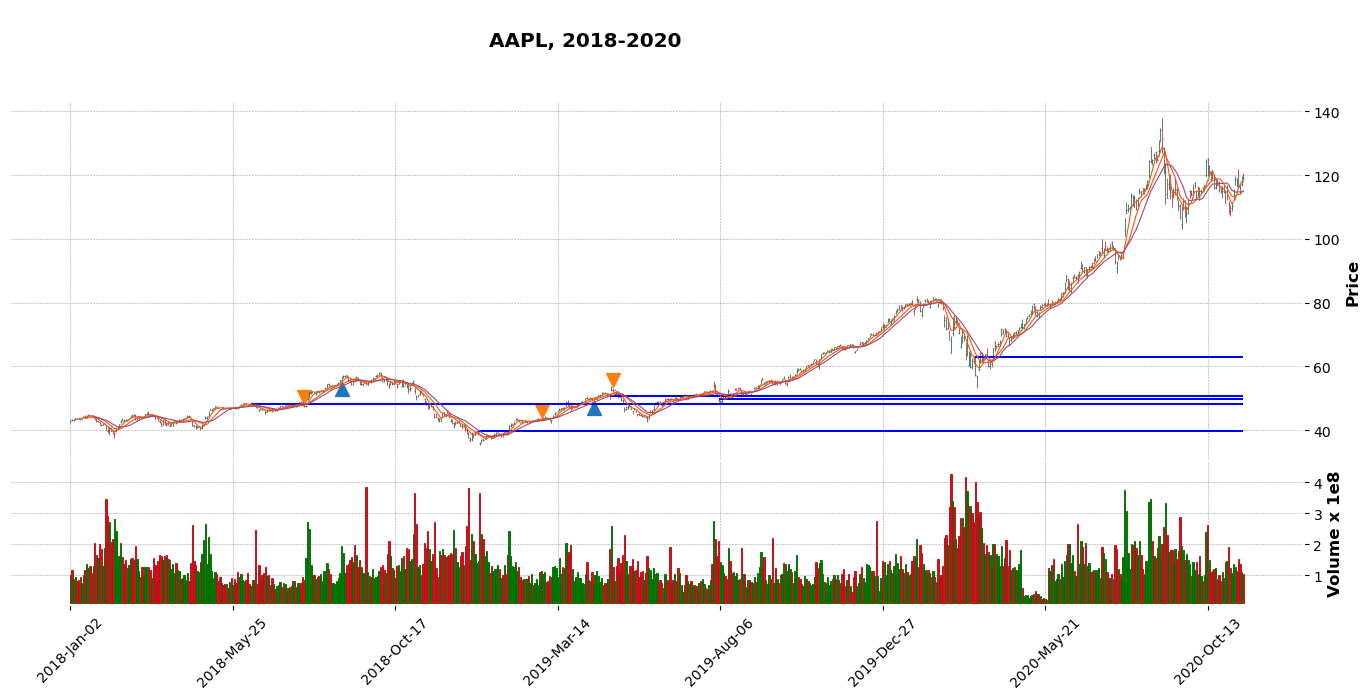

In [3]:
import numpy as np

data1=data.loc['2018-01-01':'2020-11-12']
#first we can find the critical points from some calculation
#There are 5 randomly choosen points
points=['2018-06-12','2019-01-02','2019-04-30','2019-08-05','2020-03-20']

seq_of_points=[
    [(i,data.loc[i,'High']),('2020-11-12',data.loc[i,'High'])] for i in points
] # or Lowest found, just change the argument 'High' to 'Low'

# suppose we have 3 critical upward break points and 2 downward break points represents high or low signal

points_break_up = ['2018-07-30','2019-02-28','2019-05-02'] #randomly choosen
points_break_down = ['2018-08-30','2019-04-15']

high_signal=[]
low_signal=[]
for i in [str(data1.index[j])[0:10] for j in range(len(data1))]:
    
    if i in points_break_up:
        high_signal.append(data1.loc[i,'High']*1.05)
    else: high_signal.append(np.nan)
    if i in points_break_down:
        low_signal.append(data1.loc[i,'Low']*0.95)
    else: low_signal.append(np.nan)
        


apds = [ 
         mpf.make_addplot(low_signal,type='scatter',markersize=100,marker='^'),
         mpf.make_addplot(high_signal,type='scatter',markersize=100,marker='v')
       ]


#mpf.plot(data1,style='charles',title='\nAAPL, 2018-2020',mav=(5,10,15),figratio=(25,10),figscale=1.25,
#        alines=dict(alines=seq_of_points,colors=['b' for i in range(len(seq_of_points))],linewidths=0.2),
#        addplot=apds,volume=True,savefig='AAPL_candle_line.jpg') 

# if needed, figure could be saved with codes above↑


mpf.plot(data1,style='charles',title='\nAAPL, 2018-2020',mav=(5,10,15),figratio=(25,10),figscale=1.25,
        alines=dict(alines=seq_of_points,colors=['b' for i in range(len(seq_of_points))],linewidths=0.2),
        addplot=apds,volume=True) 


## Trading Algorithm

[*********************100%***********************]  1 of 1 completed


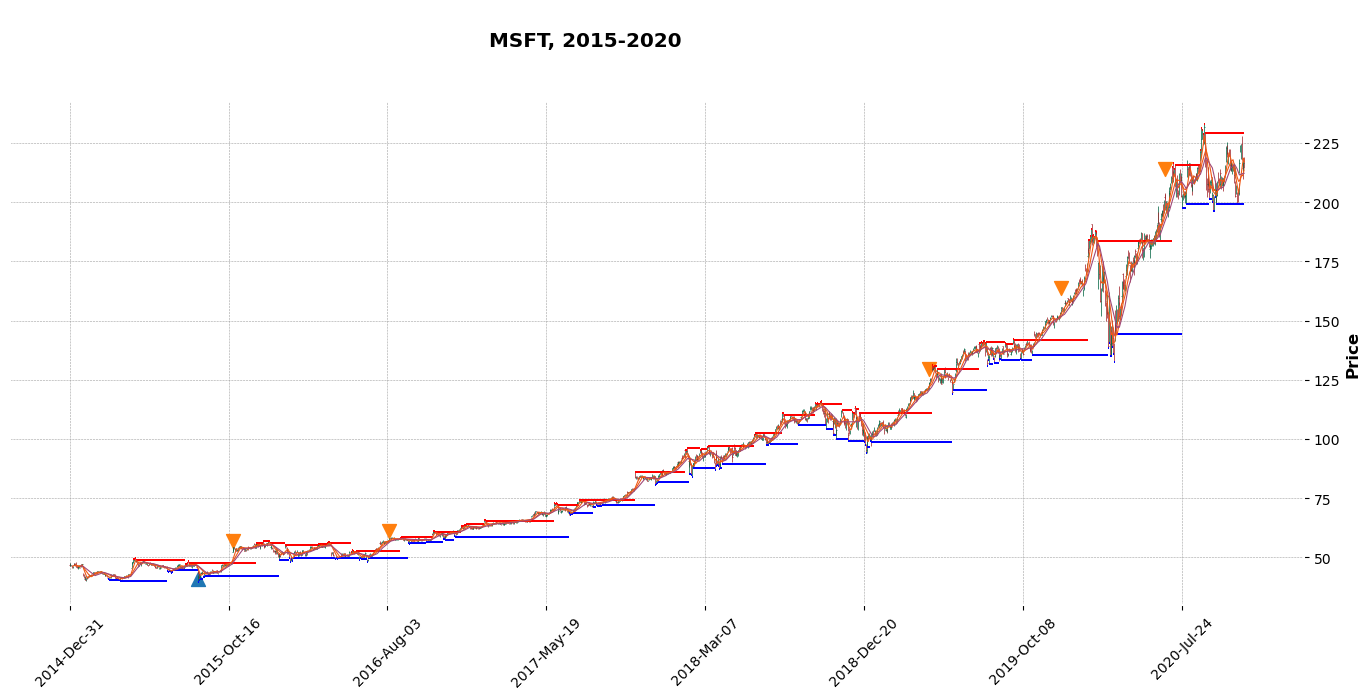

In [79]:
import pandas as pd
import warnings
data=get_data('MSFT')
warnings.filterwarnings('ignore')
data1=data.loc['2015-01-01':'2020-11-12']
data1['50maxH']=data1['High'].rolling(window=50,center=True).max()
data1['50minL']=data1['Low'].rolling(window=50,center=True).min()
data1['50meanH']=data1['High'].rolling(window=50,center=True).mean()
data1['50meanL']=data1['Low'].rolling(window=50,center=True).mean()
data1['50stdH']=data1['High'].rolling(window=50,center=True).std()
data1['50stdL']=data1['Low'].rolling(window=50,center=True).std()
data2=data1.dropna()
pointsH=[]
pointsL=[]
for i in data2.index:
    #if data2['High'][i]-2*data2['50stdH'][i]>data2['50meanH'][i]:
    if data2['High'][i]==data2['50maxH'][i] or data2['High'][i]-data2['50stdH'][i]>data2['50meanH'][i]:
        pointsH.append(str(i)[0:10])
    #if data2['Low'][i]+2*data2['50stdL'][i]<data2['50meanL'][i]:
    if data2['Low'][i]==data2['50minL'][i] or data2['Low'][i]+data2['50stdL'][i]<data2['50meanL'][i]:
        pointsL.append(str(i)[0:10])
      
        
seq_of_pointsH=[
    [(pointsH[i],data.loc[pointsH[i],'High']),(pointsH[i+1],data.loc[pointsH[i],'High'])] for i in range(len(pointsH)-1)
]+[[(pointsH[len(pointsH)-1],data.loc[pointsH[len(pointsH)-1],'High']),('2020-11-12',data.loc[pointsH[len(pointsH)-1],'High'])]]    

seq_of_pointsL=[
    [(pointsL[i],data.loc[pointsL[i],'Low']),(pointsL[i+1],data.loc[pointsL[i],'Low'])] for i in range(len(pointsL)-1)
]+[[(pointsL[len(pointsL)-1],data.loc[pointsL[len(pointsL)-1],'Low']),('2020-11-12',data.loc[pointsL[len(pointsL)-1],'Low'])]]  
seq_of_points=seq_of_pointsH+seq_of_pointsL
colors=['red' for i in range(len(seq_of_pointsH))]+['blue' for i in range(len(seq_of_pointsL))]


points_break_up =[] 
points_break_down =[]

high_signal=[]
low_signal=[]
High=0
Highi=0
Low=0
Lowi=0
Trans=[]
for i in range(len(data2)):
    

    if str(data2.index[i])[0:10] in pointsH:
        High=data2['High'][i]
        Highi=i
    if str(data2.index[i])[0:10] in pointsL:
        Low=data2['Low'][i]
        Lowi=i
    if High !=0:
        if data2['High'][i]>High*1.1 and i>Highi+25:
            Trans.append(data2['Close'][i])
            points_break_up.append(str(data2.index[i])[0:10])
            High=0
    if Low !=0:
        if data2['Low'][i]<Low and i>Lowi+25:
            Trans.append(-1*data2['Close'][i])
            points_break_down.append(str(data2.index[i])[0:10])
            Low=0
    
    
for i in [str(data.index[j])[0:10] for j in range(len(data))]:
    
    if i in points_break_up:
        high_signal.append(data.loc[i,'High']*1.05)
    else: high_signal.append(np.nan)
    if i in points_break_down:
        low_signal.append(data.loc[i,'Low']*0.95)
    else: low_signal.append(np.nan)
apds = [ 
         mpf.make_addplot(low_signal,type='scatter',markersize=100,marker='^'),
         mpf.make_addplot(high_signal,type='scatter',markersize=100,marker='v')
       ]

mpf.plot(data,style='charles',title='\nMSFT, 2015-2020',mav=(5,10,15),figratio=(25,10),figscale=1.25,
        alines=dict(alines=seq_of_points,colors=colors,linewidths=0.2),
        addplot=apds,volume=False) 


[*********************100%***********************]  1 of 1 completed


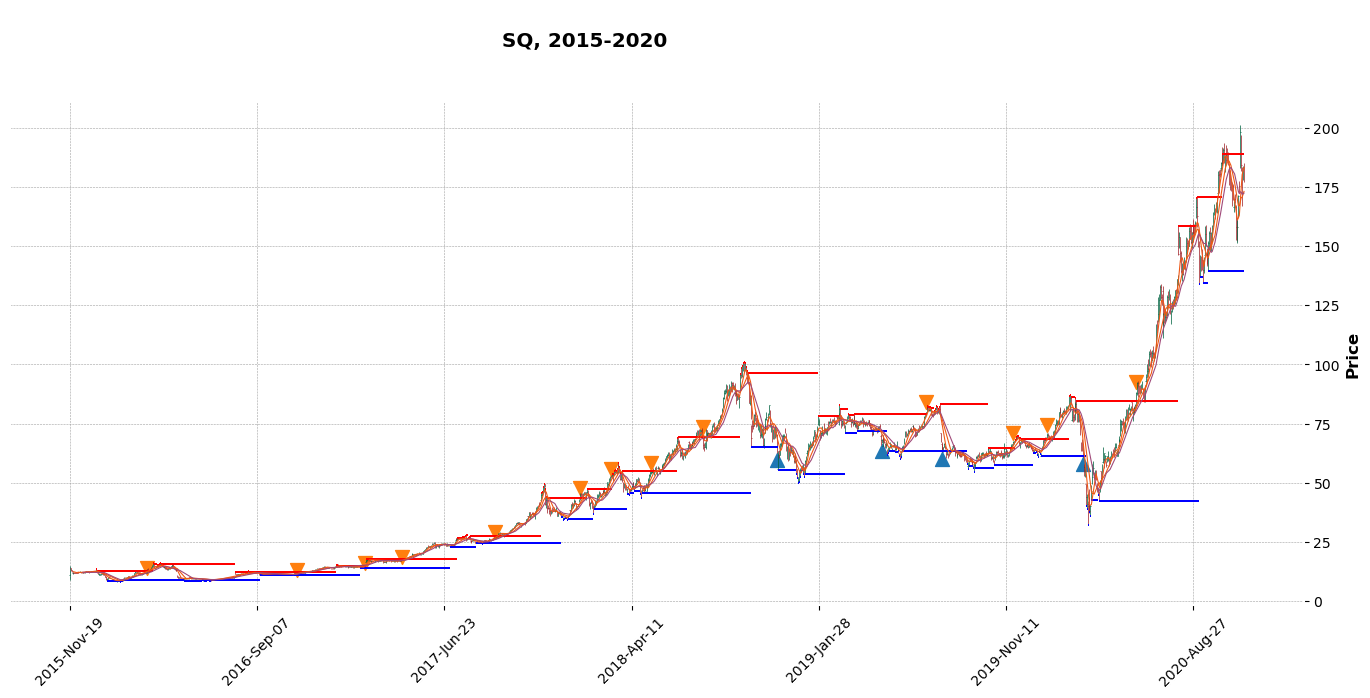

In [92]:
def fplot(stock_code):
    data=get_data(stock_code)
    data1=data.loc['2015-01-01':'2020-11-12']
    data1['50maxH']=data1['High'].rolling(window=50,center=True).max()
    data1['50minL']=data1['Low'].rolling(window=50,center=True).min()
    data1['50meanH']=data1['High'].rolling(window=50,center=True).mean()
    data1['50meanL']=data1['Low'].rolling(window=50,center=True).mean()
    data1['50stdH']=data1['High'].rolling(window=50,center=True).std()
    data1['50stdL']=data1['Low'].rolling(window=50,center=True).std()
    data2=data1.dropna()
    pointsH=[]
    pointsL=[]
    for i in data2.index:
        #if data2['High'][i]-2*data2['50stdH'][i]>data2['50meanH'][i]:
        if data2['High'][i]==data2['50maxH'][i] or data2['High'][i]-data2['50stdH'][i]>data2['50meanH'][i]:
            pointsH.append(str(i)[0:10])
        #if data2['Low'][i]+2*data2['50stdL'][i]<data2['50meanL'][i]:
        if data2['Low'][i]==data2['50minL'][i] or data2['Low'][i]+data2['50stdL'][i]<data2['50meanL'][i]:
            pointsL.append(str(i)[0:10])


    seq_of_pointsH=[
        [(pointsH[i],data.loc[pointsH[i],'High']),(pointsH[i+1],data.loc[pointsH[i],'High'])] for i in range(len(pointsH)-1)
    ]+[[(pointsH[len(pointsH)-1],data.loc[pointsH[len(pointsH)-1],'High']),('2020-11-12',data.loc[pointsH[len(pointsH)-1],'High'])]]    

    seq_of_pointsL=[
        [(pointsL[i],data.loc[pointsL[i],'Low']),(pointsL[i+1],data.loc[pointsL[i],'Low'])] for i in range(len(pointsL)-1)
    ]+[[(pointsL[len(pointsL)-1],data.loc[pointsL[len(pointsL)-1],'Low']),('2020-11-12',data.loc[pointsL[len(pointsL)-1],'Low'])]]  
    seq_of_points=seq_of_pointsH+seq_of_pointsL
    colors=['red' for i in range(len(seq_of_pointsH))]+['blue' for i in range(len(seq_of_pointsL))]


    points_break_up =[] 
    points_break_down =[]

    high_signal=[]
    low_signal=[]
    High=0
    Highi=0
    Low=0
    Lowi=0
    Trans=[]
    for i in range(len(data2)):


        if str(data2.index[i])[0:10] in pointsH:
            High=data2['High'][i]
            Highi=i
        if str(data2.index[i])[0:10] in pointsL:
            Low=data2['Low'][i]
            Lowi=i
        if High !=0:
            if data2['High'][i]>High and i>Highi+25:
                Trans.append(data2['Close'][i])
                points_break_up.append(str(data2.index[i])[0:10])
                High=0
        if Low !=0:
            if data2['Low'][i]<Low and i>Lowi+25:
                Trans.append(-1*data2['Close'][i])
                points_break_down.append(str(data2.index[i])[0:10])
                Low=0


    for i in [str(data.index[j])[0:10] for j in range(len(data))]:

        if i in points_break_up:
            high_signal.append(data.loc[i,'High']*1.05)
        else: high_signal.append(np.nan)
        if i in points_break_down:
            low_signal.append(data.loc[i,'Low']*0.95)
        else: low_signal.append(np.nan)
    apds = [ 
             mpf.make_addplot(low_signal,type='scatter',markersize=100,marker='^'),
             mpf.make_addplot(high_signal,type='scatter',markersize=100,marker='v')
           ]

    mpf.plot(data,style='charles',title='\n%s, 2015-2020'%(stock_code),mav=(5,10,15),figratio=(25,10),figscale=1.25,
            alines=dict(alines=seq_of_points,colors=colors,linewidths=0.2),
            addplot=apds,volume=False) 
fplot('SQ')

[*********************100%***********************]  1 of 1 completed


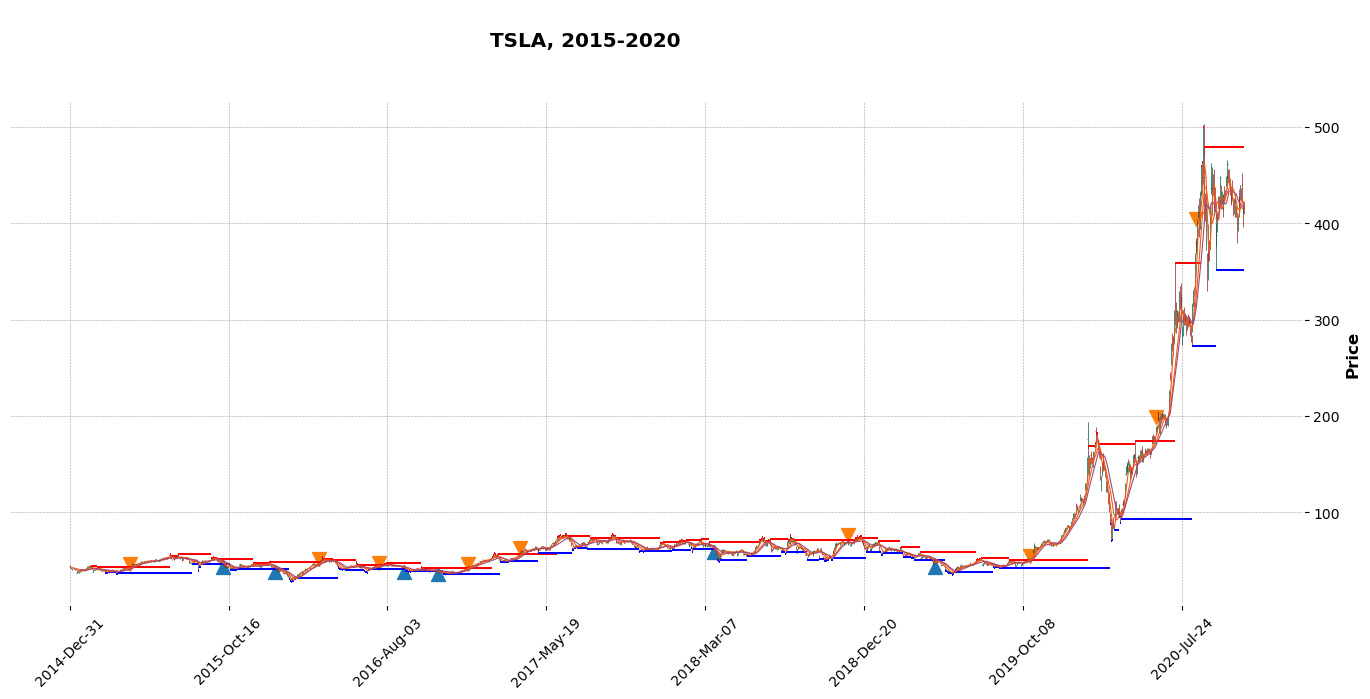

In [93]:
fplot('TSLA')

[*********************100%***********************]  1 of 1 completed


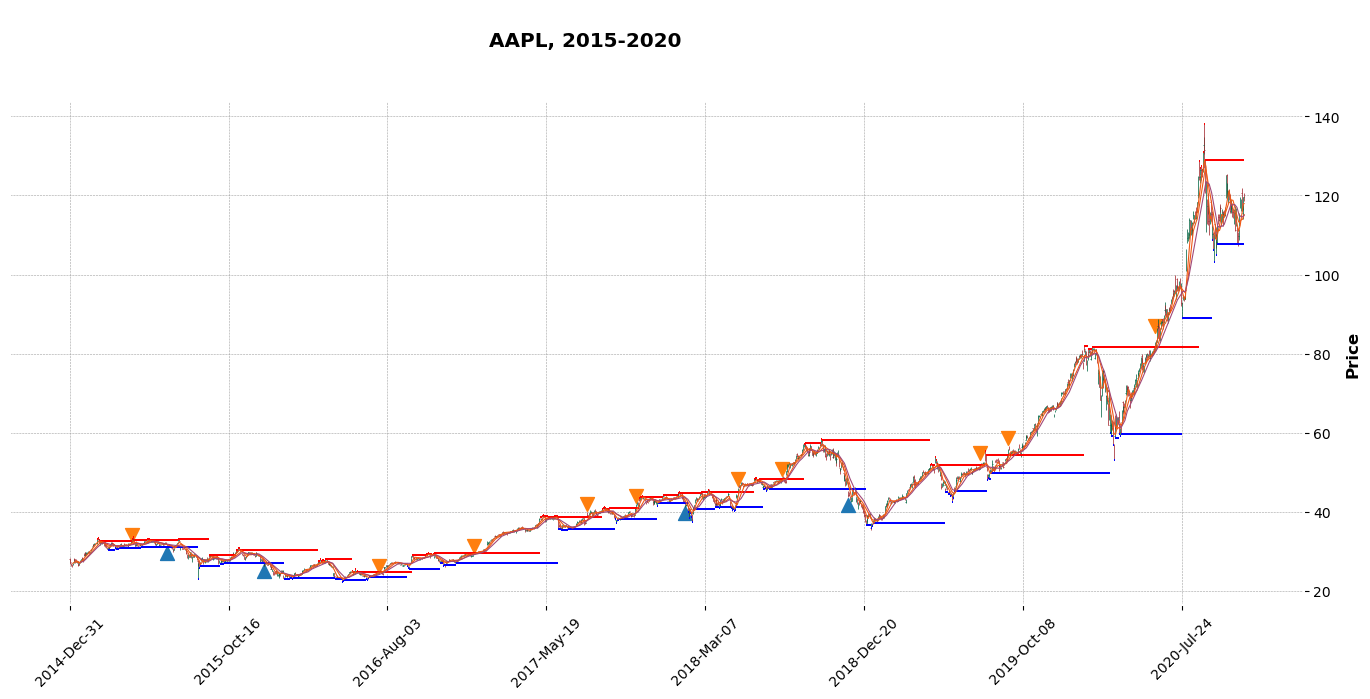

In [94]:
fplot('AAPL')

[*********************100%***********************]  1 of 1 completed


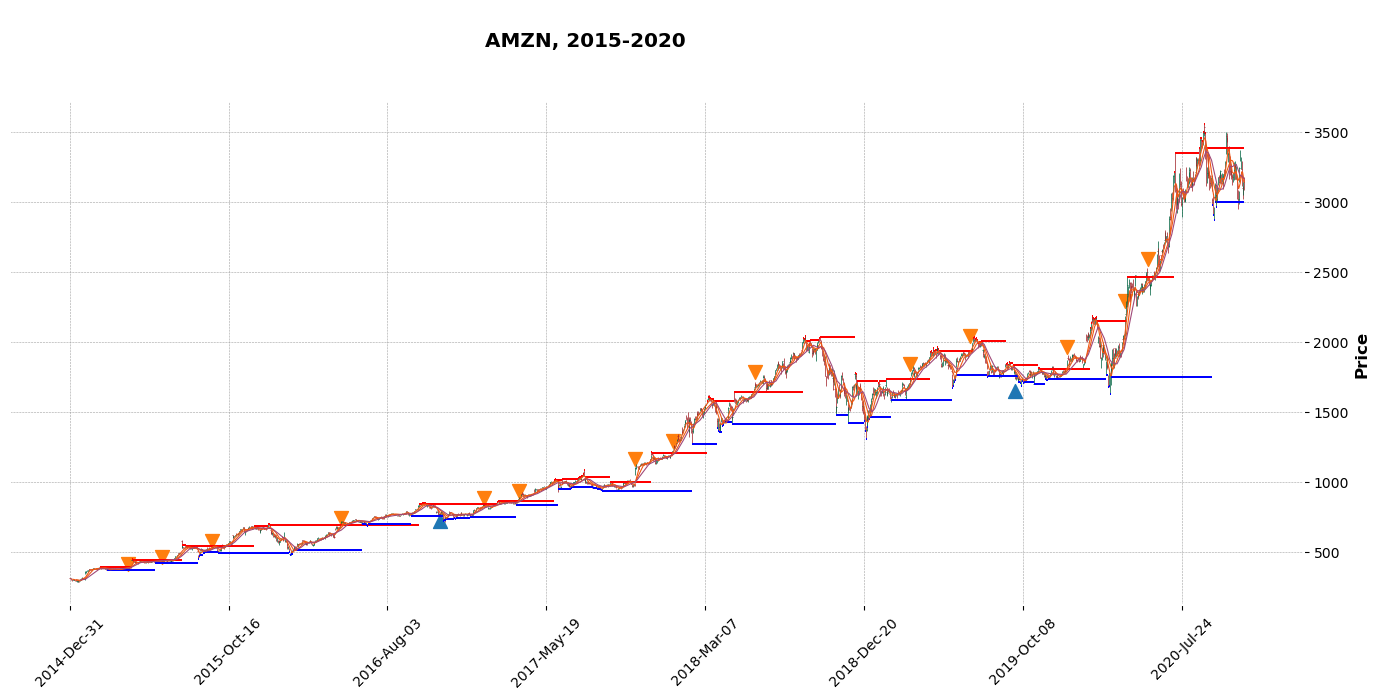

In [95]:
fplot('AMZN')

[*********************100%***********************]  1 of 1 completed


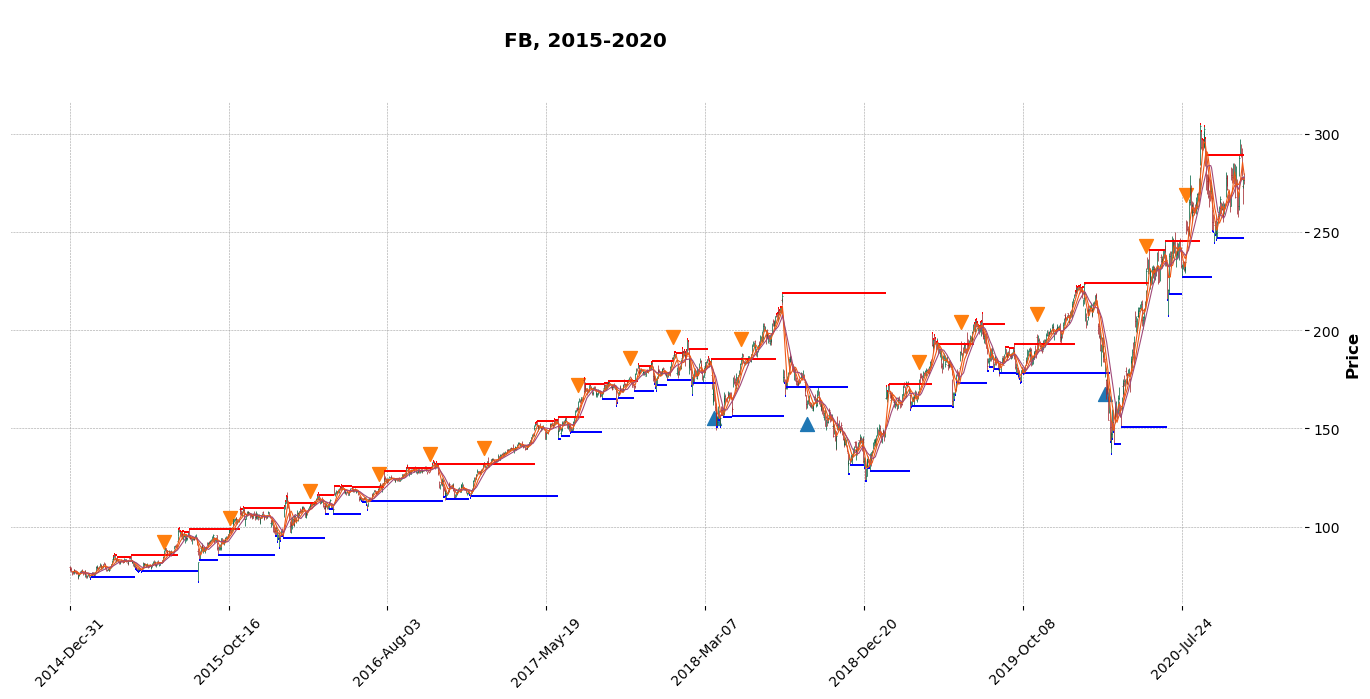

In [96]:
fplot('FB')

[*********************100%***********************]  1 of 1 completed


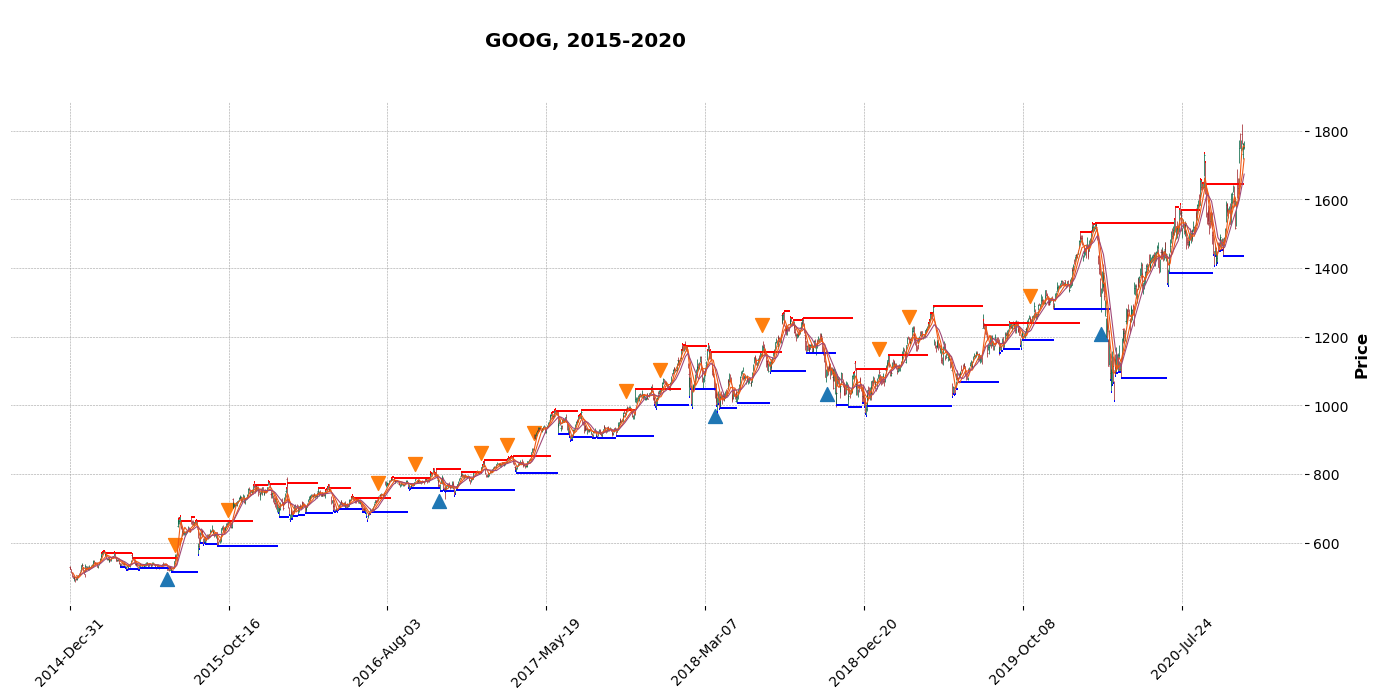

In [97]:
fplot('GOOG')

[*********************100%***********************]  1 of 1 completed


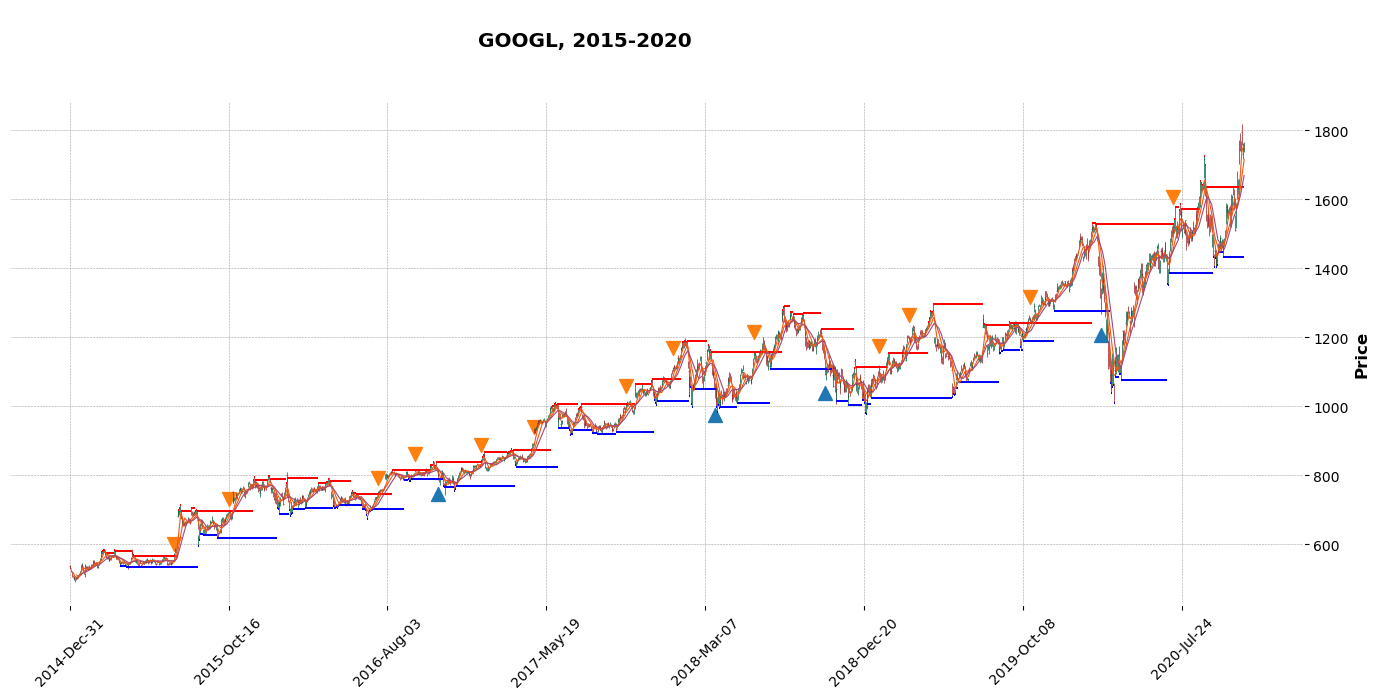

In [98]:
fplot('GOOGL')

[*********************100%***********************]  1 of 1 completed


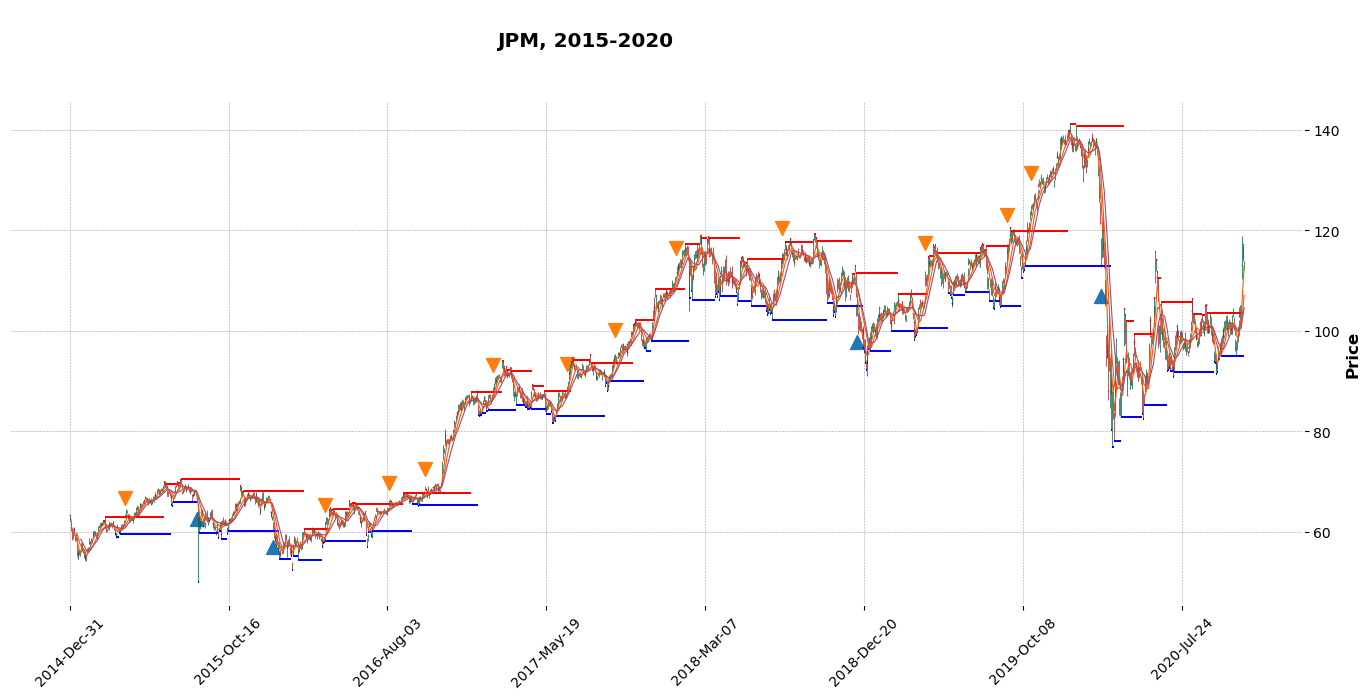

In [99]:
fplot('JPM')

[*********************100%***********************]  1 of 1 completed


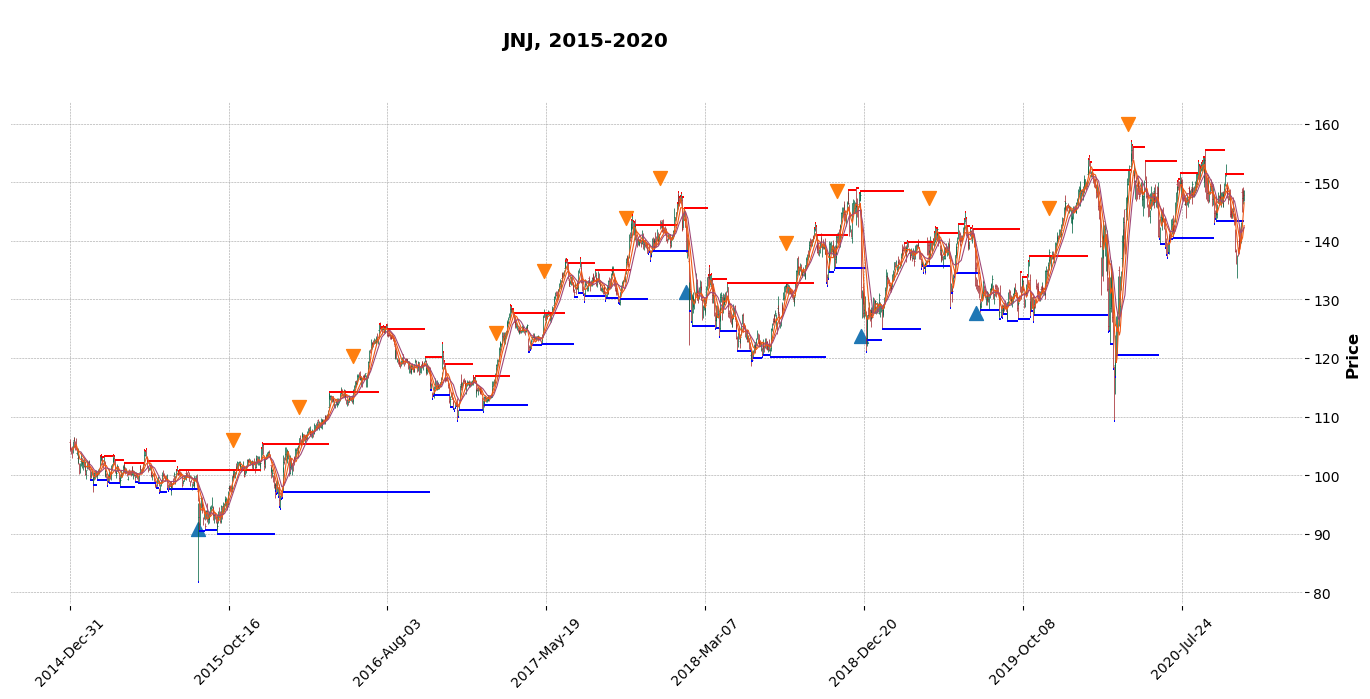

In [100]:
fplot('JNJ') #强生

[*********************100%***********************]  1 of 1 completed


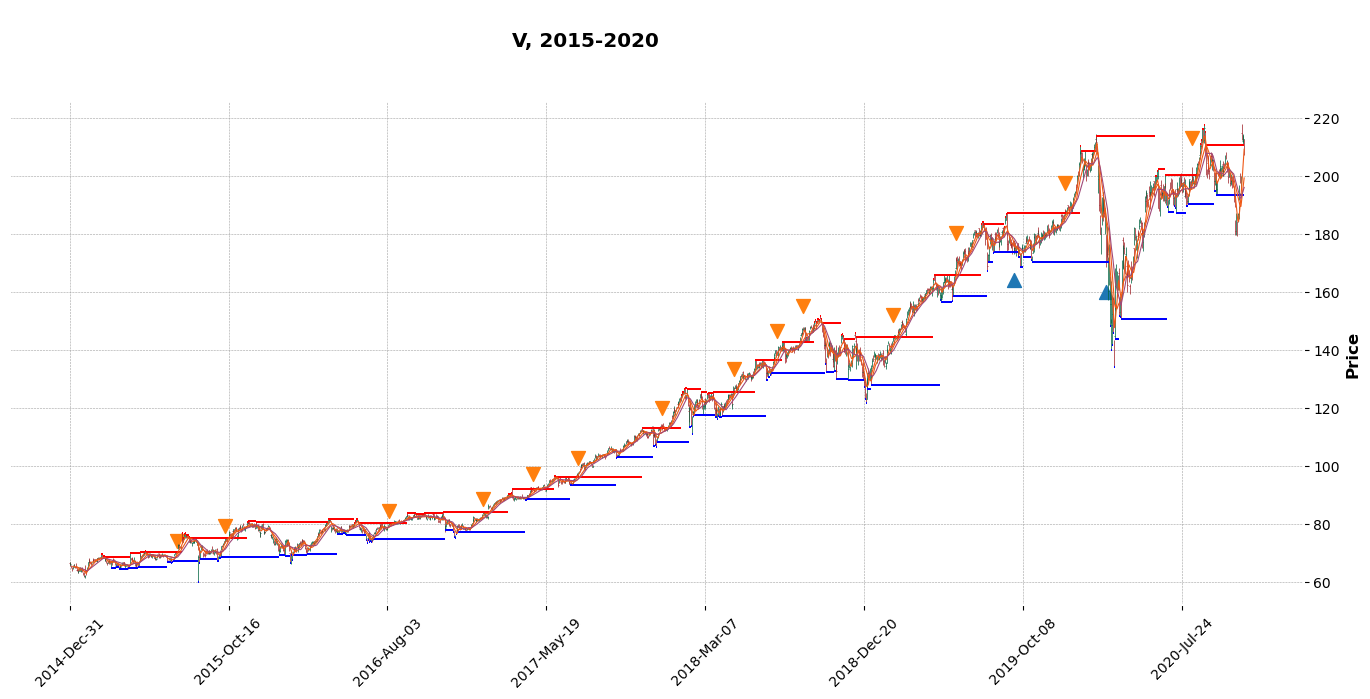

In [101]:
fplot('V') #VISA